Сборный проект - 1 (аналитический кейс)

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data_games_sales = pd.read_csv('/datasets/games.csv')

In [3]:
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data_games_sales.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверка данных по каждому столбцу.

In [5]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

In [6]:
check_columns(data_games_sales)

Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения столбца Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения столбца NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 

In [7]:
data_games_sales[data_games_sales['User_Score'] == '0']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [8]:
data_games_sales[data_games_sales['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data_games_sales[data_games_sales['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data_games_sales[data_games_sales['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data_games_sales[data_games_sales['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data_games_sales[data_games_sales['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data_games_sales['Name'].value_counts()

Need for Speed: Most Wanted              12
Ratatouille                               9
LEGO Marvel Super Heroes                  9
Madden NFL 07                             9
FIFA 14                                   9
                                         ..
T'ai Fu: Wrath of the Tiger               1
Art Academy: Home Studio                  1
Capcom vs. SNK                            1
Phantasy Star Nova                        1
IGT Slots: Lucky Larry's Lobstermania     1
Name: Name, Length: 11559, dtype: int64

In [14]:
data_games_sales[data_games_sales['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Выводы:

Аномалий:

-Пропуски по столцам Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
-Аномалия tbd. Расшифровывается с ангилийского "to be defined". Это нормальное явление для компьютерных игр. Компьютерная игра должна пройте через определенное количество игроков или экспертов-геймеров, чтобы они дали оценку игре.
-Тип столбца Year_of_Release. Год - целое число.
-Дубликаты по имени, платформе и году выпуска. Возможно эту игру вносили несколько раз, давая информацию о разных рынках продажи.

-Пропуски в столбцах Name и Genre. Это строки 659 и 14244. По году и платформе видно. Что это одна и также игра, только в одной строке храниться данные о продажах в Европе и Америке, а во второй - только по Японии.
-Пропуск в столбце Year_of_Release. Аггрегатор игр мог и не получить информацию от создателей или издателей игр.

Пропуски в столбцах Critic_Score, User_Score и Rating. Оценка игр походит не быстро, а может даже вообще не пройти,
так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Из-за этого в большинстве случаев
отсутсвуют оценки игроков или ESRB оценка.

Шаг 2. Подготовьте данные

Изменение название столбцов

In [15]:
#new_columns = [column.lower() for column in data_games_sales.columns]
#new_columns

In [16]:
#data_games_sales.columns = new_columns
#data_games_sales.info()
data_games_sales.columns = data_games_sales.columns.str.lower()
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменение типа данных

In [17]:
data_games_sales['year_of_release'] = pd.to_numeric(data_games_sales['year_of_release'], downcast='integer')
data_games_sales['critic_score'] = pd.to_numeric(data_games_sales['critic_score'], downcast='integer')
data_games_sales['user_score'] = pd.to_numeric(data_games_sales['user_score'], downcast='float', errors ='coerce')
data_games_sales['user_score'] = data_games_sales['user_score'].round(1)
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


Видно, что из-за значения NaN столбец не переводится в тип int. Проведем перевод в нужный тип после восстановления или удаления строк.

In [18]:
data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработка пропусков

Удаление строк 659 и 14244

In [19]:
data_games_sales.drop([659, 14244],inplace=True)
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.5+ MB


Восстановление и удаление значений по столбцу year_of_release. Для игр с годом в названии проанализируем жанр.

In [20]:
nan_year_data = data_games_sales[data_games_sales['year_of_release'].isna()]
nan_year_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
def fill_year(row):
    year = 0
    last_word = ''
    genre = row[3]
    for word in row[0].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre in ('Sports', 'Racing', 'Fighting'):
        if year > 2000 or last_word in ('2K6','2K8'):
            if genre == 'Sports':
                year -=1
            if last_word == '2K6':
                year = 2005
            elif last_word == '2K8':
                year = 2007
            if year < 2017 and np.isnan(row[2]):
                row[2] = year
    return row

data_games_sales = data_games_sales.apply(fill_year, axis=1)
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Для аналитики не нужны игры без года создания, т.к. данные не могут быть актуальными на выбранный позднее период

In [22]:
data_games_sales.drop(data_games_sales[data_games_sales['year_of_release'].isna()].index,inplace=True)
data_games_sales['year_of_release'] = pd.to_numeric(data_games_sales['year_of_release'], downcast='integer')
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int16  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           9781 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


Восстановление рейтинга ESRB. Определение самой популярной оценки для жанра и составим словарь

In [23]:
genre_list = data_games_sales['genre'].unique()
genre_dict = {}
for genre in genre_list:
    print('Популярные оценки для жанра ', genre)
    rating_value_counts = data_games_sales[data_games_sales['genre'] == genre]['rating'].value_counts()
    print(rating_value_counts)
    genre_dict[genre] = rating_value_counts.index[0]
    
genre_dict

Популярные оценки для жанра  Sports
E       1173
T        195
E10+     106
M         16
Name: rating, dtype: int64
Популярные оценки для жанра  Platform
E       354
E10+    141
T        63
M         3
Name: rating, dtype: int64
Популярные оценки для жанра  Racing
E       577
T       167
E10+     95
M        18
Name: rating, dtype: int64
Популярные оценки для жанра  Role-Playing
T       415
M       161
E10+    111
E        83
Name: rating, dtype: int64
Популярные оценки для жанра  Puzzle
E       284
E10+     42
T        10
Name: rating, dtype: int64
Популярные оценки для жанра  Misc
E       449
T       228
E10+    166
M        13
EC        5
K-A       1
Name: rating, dtype: int64
Популярные оценки для жанра  Shooter
M       553
T       340
E10+     56
E        47
Name: rating, dtype: int64
Популярные оценки для жанра  Simulation
E       321
T       186
E10+     47
M         5
Name: rating, dtype: int64
Популярные оценки для жанра  Action
T       670
M       596
E10+    468
E       410
E

{'Sports': 'E',
 'Platform': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Puzzle': 'E',
 'Misc': 'E',
 'Shooter': 'M',
 'Simulation': 'E',
 'Action': 'T',
 'Fighting': 'T',
 'Adventure': 'E',
 'Strategy': 'T'}

In [24]:
data_games_sales['rating'] = data_games_sales['rating'].fillna('NR')

def fill_rating(row):
    if row[10] == 'NR':
        row[10] = genre_dict[row[3]]
    return row

data_games_sales = data_games_sales.apply(fill_rating, axis=1)
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16462 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
data_games_sales['rating'].value_counts()

E       7695
T       5524
M       1836
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Удаление дупликатов

In [26]:
data_games_sales.drop_duplicates()
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16462 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Поиск дупликатов по названию игры, платформе и году.

In [27]:
part_data_games_sales = data_games_sales.loc[:, 'name':'year_of_release']
part_data_games_sales.drop_duplicates()
part_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16462 non-null  object
 1   platform         16462 non-null  object
 2   year_of_release  16462 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 514.4+ KB


Добавление столбца "Продажи по миру"

In [28]:
data_games_sales['world_sales'] = (data_games_sales['na_sales'] + data_games_sales['eu_sales'] 
                                   + data_games_sales['jp_sales'] + data_games_sales['other_sales'])
data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


Вывод

-Название столбцов было приведено к нижнему регистру
-Восстановлены пропуски в строках.
-Удалены строки без нужных данных.

Шаг 3. Проведите исследовательский анализ данных

-Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
-Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение
по годам. За какой характерный срок появляются новые и исчезают старые платформы?
-Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования
предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
-Не учитывайте в работе данные за предыдущие годы.
-Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
-Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
-Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму 
рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
-Соотнесите выводы с продажами игр на других платформах.
-Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими 
и низкими продажами?

Начнем с первого вопроса

In [29]:
year_of_release_pivot_table = pd.pivot_table(data_games_sales, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
year_of_release_pivot_table

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

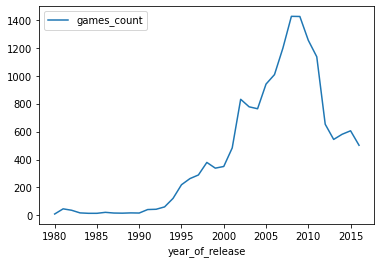

In [30]:
year_of_release_pivot_table.plot()

Данные по всем периодам не важны.

С 1980 годов по 1993 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC) и технологий языков программирования.

В 2002 году видно, что выпустилось много игр. Это значит в период с 1997 по 2002 появились игровые движки для создания реалистичных игр и новые средства программирования.

Пик в 2009 это не только популярность к созданию компьютерных игр, но и распространенность компьютерных движков, некоторые из которых бесплатны к использованию на сегодняшний день.

Спад индустри игр с 2012 по 2016 обусловлен экономическим кризисом и требованиям к игре. Крупные студии-разработчики как Blizzard создают игры по 10-15 лет, так как хотят порадовать своих фанатов новым гемплеем, современными технологиями и новой графикой.

Подготовим данные по 2 вопросу

In [31]:
platform_sales_pivot_table = pd.pivot_table(data_games_sales, index=['platform'], values='world_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('world_sales',ascending=False)
platform_sales_pivot_table

,world_sales
platform,
PS2,1247.53
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.69


Рассмотрим первую шестерку платформ по годам.

In [32]:
best_sales_platform = list(platform_sales_pivot_table.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [33]:
data_games_sales.loc[15957, 'year_of_release'] = 2007

In [34]:
for platform in best_sales_platform:
    print('Платформа ',platform)
    platform_sales_pivot_table = pd.pivot_table(data_games_sales.query('platform == @platform'), index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
    print(platform_sales_pivot_table)
    print()

Платформа  PS2
                          world_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.78
         2003                  194.27
         2004                  212.13
         2005                  160.91
         2006                  106.46
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

Платформа  X360
                          world_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.63
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.89
         2012                   99.74
         2013                   88.58
         2014     

In [35]:
print('Платформа ','PS4')
platform_sales_pivot_table = pd.pivot_table(data_games_sales.query('platform == "PS4"'), 
                                            index=['platform','year_of_release'], 
                                            values='world_sales', aggfunc='sum')
print(platform_sales_pivot_table)
print()

Платформа  PS4
                          world_sales
platform year_of_release             
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25



Для платформ, которые пользуются популярностью, срок использования равен 8-12 лет. Можно проследить, как менялись поколения для приствок PlayStation:

-PS 1994-2003
-PS2 2000-2011
-PS3 2006-2016
-PS4 2013-по сегодняшний день
Получается каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.

Подготовим данные для вопроса 3 и дадим ответ.

Актуальным периодом по продажам считаю с 2013 по 2016 год.

Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год.
После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества.
Большинство студий разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года.
Хорошие игры на рынке продаются в течении нескольких лет.

In [36]:
actual_data_games_sales = data_games_sales.query('year_of_release > 2012')
actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Сделав отсев по году, одновременно дали ответ на 4й вопрос.

In [37]:
actual_data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Подготовим данные по 5 вопросу.

Определим самые прибыльные платформы за актуальный период

In [38]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform','year_of_release'], 
                                     values='world_sales', aggfunc = 'sum')
best_sales_platform

world_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [39]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index='platform', 
                                     values='world_sales', aggfunc = 'sum')
best_sales_platform.sort_values('world_sales', ascending=False)

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS. Их суммарный доход за 3 года около 1 миллиарда долларов.

Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP соотвественно. Так же можно заметить прирост у PC.

Подготовим данные по 6 вопросу.

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

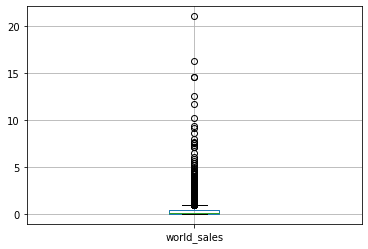

In [40]:
actual_data_games_sales.boxplot(column = 'world_sales')
actual_data_games_sales['world_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

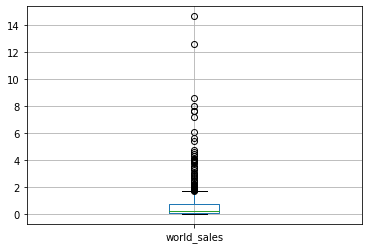

In [41]:
PS4_actual_data_games_sales = actual_data_games_sales.query('platform =="PS4"')
PS4_actual_data_games_sales.boxplot(column = 'world_sales')
PS4_actual_data_games_sales['world_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: world_sales, dtype: float64

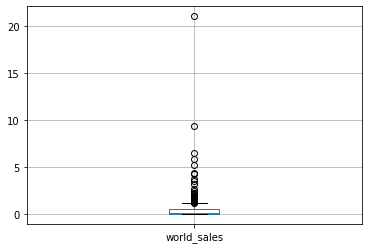

In [42]:
PS3_actual_data_games_sales = actual_data_games_sales.query('platform =="PS3"')
PS3_actual_data_games_sales.boxplot(column = 'world_sales')
PS3_actual_data_games_sales['world_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: world_sales, dtype: float64

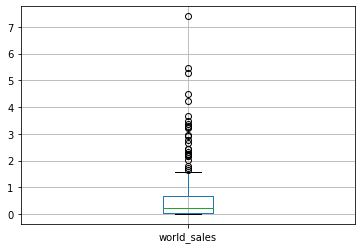

In [43]:
XOne_actual_data_games_sales = actual_data_games_sales.query('platform =="XOne"')
XOne_actual_data_games_sales.boxplot(column = 'world_sales')
XOne_actual_data_games_sales['world_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: world_sales, dtype: float64

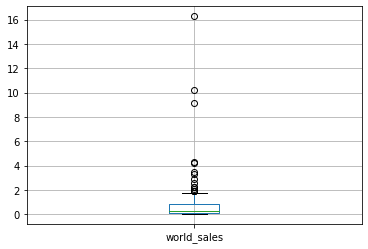

In [44]:
X360_actual_data_games_sales = actual_data_games_sales.query('platform =="X360"')
X360_actual_data_games_sales.boxplot(column = 'world_sales')
X360_actual_data_games_sales['world_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

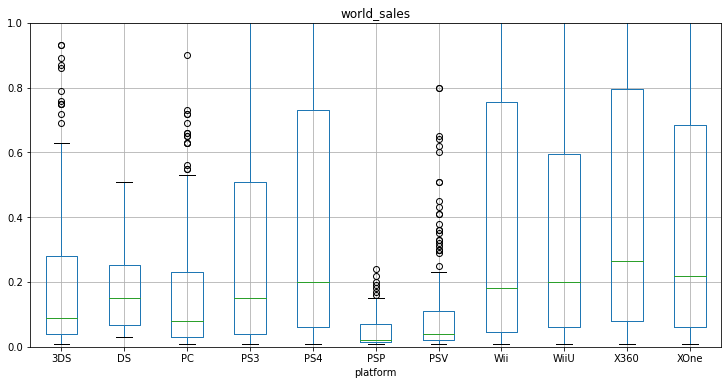

In [45]:
_3DS_actual_data_games_sales = actual_data_games_sales.query('platform =="3DS"')
#_3DS_actual_data_games_sales.boxplot(column = 'world_sales')
#_3DS_actual_data_games_sales.boxplot(column = 'world_sales', by = 'platform', figsize = (2, 100))
actual_data_games_sales.boxplot(column = 'world_sales', by = 'platform', figsize = (12, 6))
plt.ylim(0,1)
plt.suptitle('');
actual_data_games_sales['world_sales'].describe()

Разница в продажах отличается. Имеются очень популярные игры, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Период 2013-2016 год

-Средняя выручка на игру по миру: 488 тыс. дол. 3/4 игр заработали до 400 тыс. Рекорд 21 млн.
-Средняя выручка на игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.
-Средняя выручка на игру по платформе PS3: 526 тыс. 3/4 игр заработали до 510 тыс. Рекорд 21 млн.
-Средняя выручка на игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.
-Средняя выручка на игру по платформе X360: 735 тыс. 3/4 игр заработали до 795 тыс. Рекорд 16,3 млн.
-Средняя выручка на игру по платформе 3DS: 472 тыс. 3/4 игр заработали до 280 тыс. Рекорд 14,6 млн.
Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на XOne и X360.

In [46]:
#_3DS_actual_data_games_sales.boxplot(column = 'world_sales', by = 'platform', figsize = (2, 100))


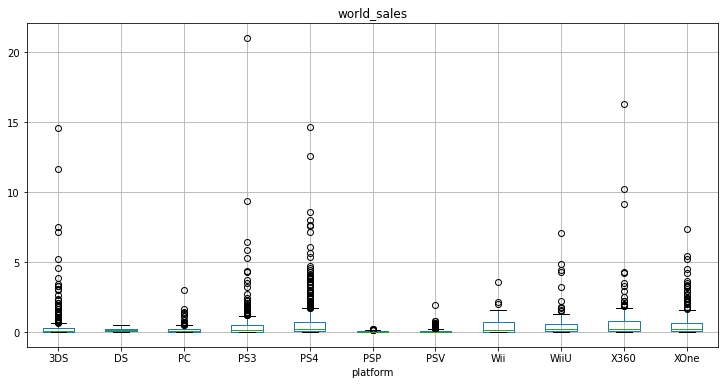

In [47]:
# check
actual_data_games_sales.boxplot(column = 'world_sales', by = 'platform', figsize = (12, 6))
plt.suptitle('');

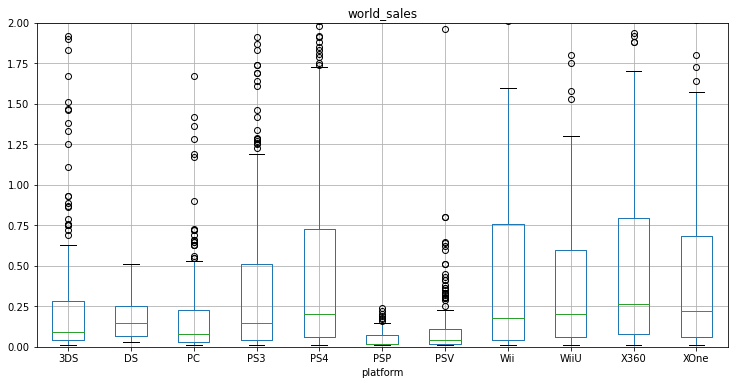

In [48]:
# check
actual_data_games_sales.boxplot(column = 'world_sales', by = 'platform', figsize = (12, 6))
plt.ylim(0,2)
plt.suptitle('');

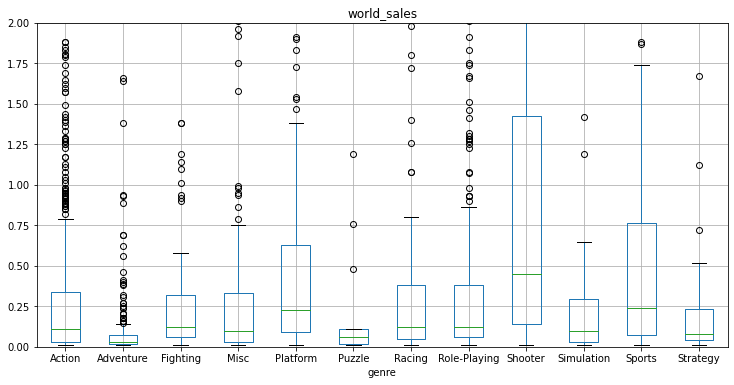

In [49]:
actual_data_games_sales.boxplot(column = 'world_sales', by = 'genre', figsize = (12, 6))
plt.ylim(0,2)
plt.suptitle('');

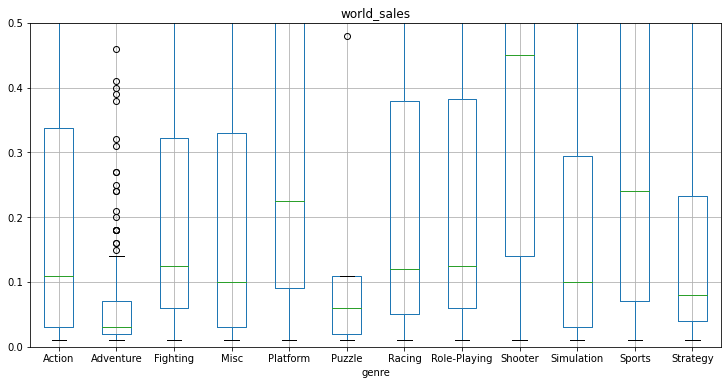

In [50]:
actual_data_games_sales.boxplot(column = 'world_sales', by = 'genre', figsize = (12, 6))
plt.ylim(0, 0.5)
plt.suptitle('');

Прибыльность по жанрам примерно схожая, за исключением Shooter, Adventure и Puzzle. Если у других жанров медиана держится на уровне 0,1 - 0,2, то жанры "приключения" и "Пазлы" особо никто не выбирает, что нельзя сказать о стрелялках, где показания зашкаливают.

#### check r.1.2

Подготовим данные для вопроса 7

In [51]:
PS4_sales_crit_and_user_ratings = PS4_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
PS4_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [52]:
PS4_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


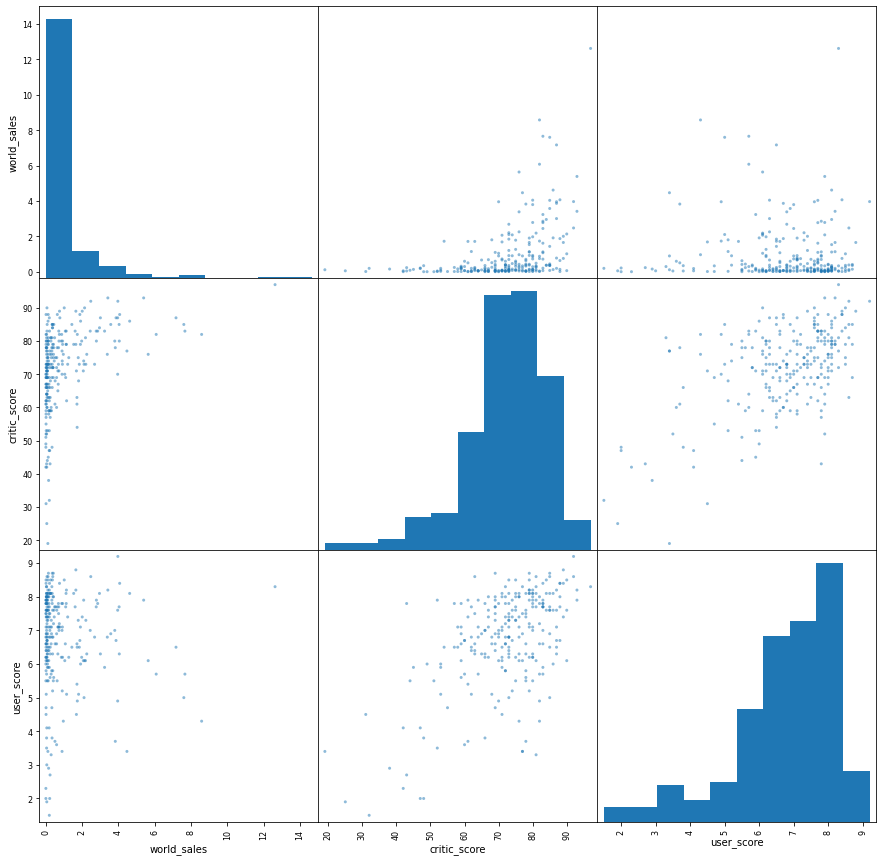

In [53]:
pd.plotting.scatter_matrix(PS4_sales_crit_and_user_ratings, figsize=(15, 15));

Для платформы PS4 важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам не носит сильного смысла.

Важно заметить, что на мнение игроков влияет рейтинг. То есть, чем выше ценит игру критик, тем выше оценит ее игрок.

Подготовим данные для вопроса 8.

In [54]:
PS3_sales_crit_and_user_ratings = PS3_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
PS3_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
16,21.05,97.0,8.2
69,9.36,71.0,2.6
126,6.46,86.0,4.3
149,5.86,95.0,9.1
180,5.27,NaN,NaN


In [55]:
PS3_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

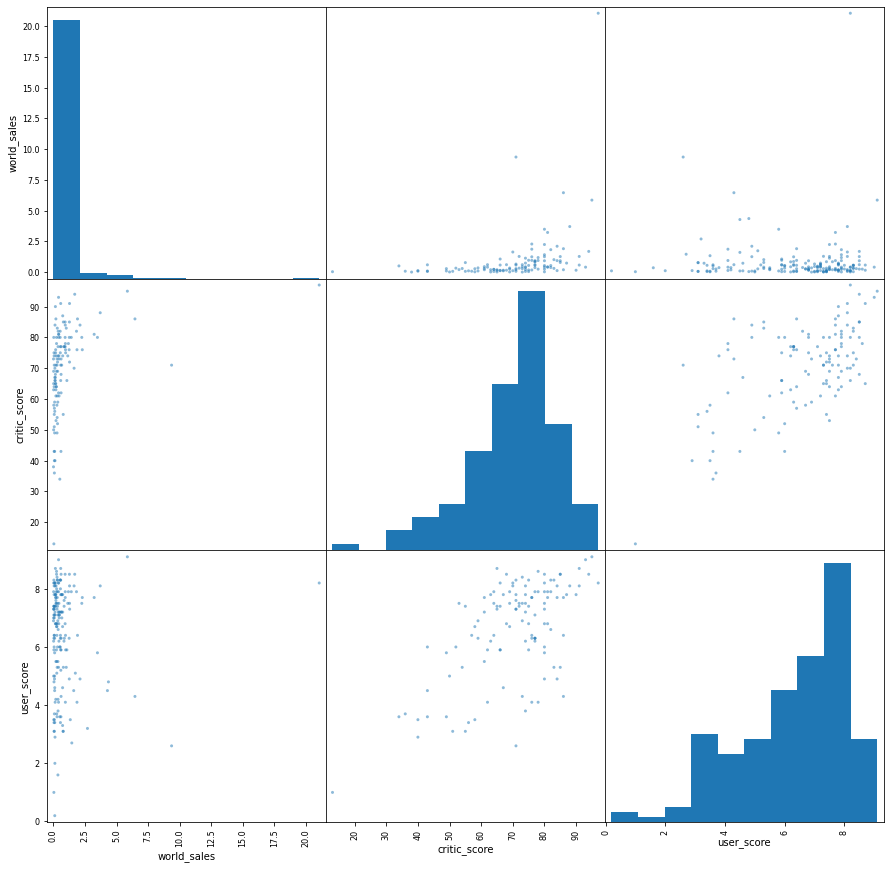

In [56]:
pd.plotting.scatter_matrix(PS3_sales_crit_and_user_ratings, figsize=(15, 15))

По платформе PS3 имеются похожие тенденции как и у PS4, только хуже.

In [57]:
XOne_sales_crit_and_user_ratings = XOne_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
XOne_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [58]:
XOne_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

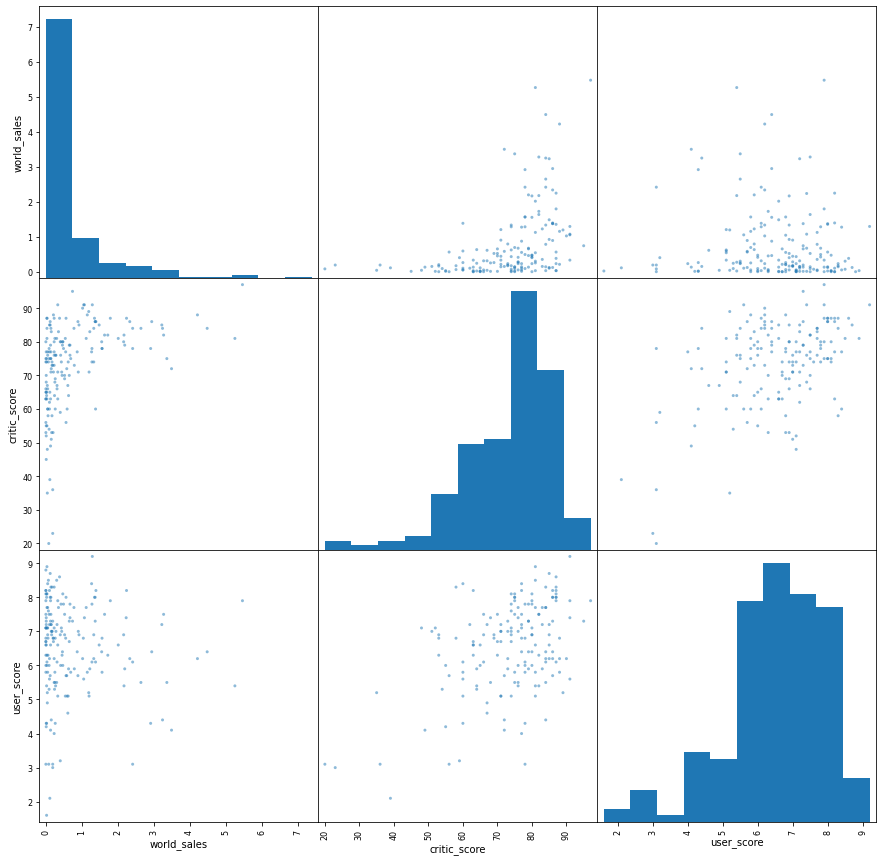

In [59]:
pd.plotting.scatter_matrix(XOne_sales_crit_and_user_ratings, figsize=(15, 15))

In [60]:
X360_sales_crit_and_user_ratings = X360_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
X360_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
72,9.18,NaN,NaN
263,4.28,NaN,4.9
271,4.22,84.0,4.2


In [61]:
X360_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

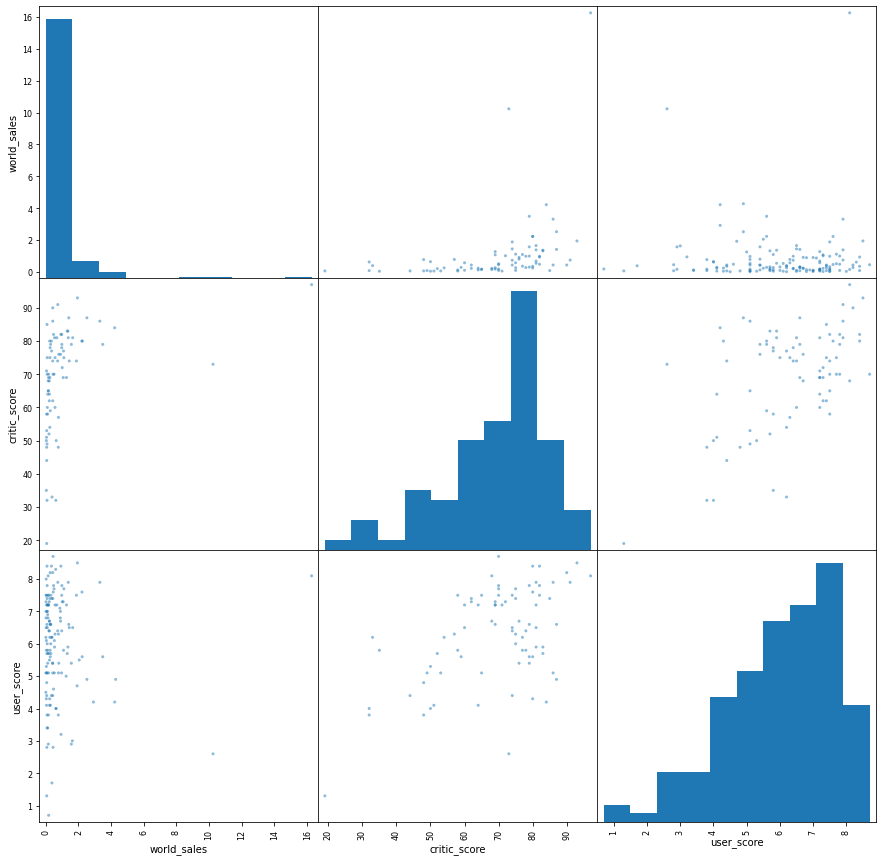

In [62]:
pd.plotting.scatter_matrix(X360_sales_crit_and_user_ratings, figsize=(15, 15))

In [63]:
_3DS_sales_crit_and_user_ratings = _3DS_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
_3DS_sales_crit_and_user_ratings.head()

,world_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
184,5.22,NaN,NaN


In [64]:
_3DS_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

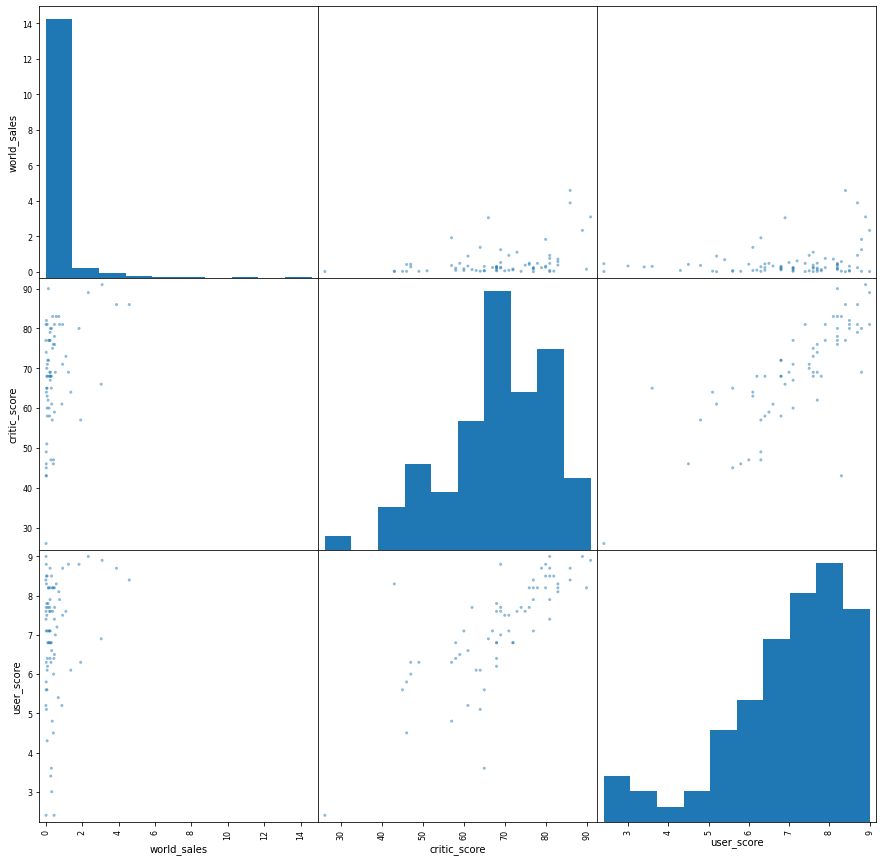

In [65]:
pd.plotting.scatter_matrix(_3DS_sales_crit_and_user_ratings, figsize=(15, 15))

Платформы PS3, XOne и X360 имеют похожие связи, как и у PS4.

Выделяется 3DS, чьи продажи зависят напрямую, хоть и не сильно от рейтинга игроков. Возможно здесь идет лучше работа по составлению рейтинга для игр и системы отзывов для игроков. А может игры в целом очень популярные и интересные и их не очень много, как у других платформ.

Подготовим данные по вопросу 9.

In [66]:
genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='sum')
genre_pivot_table.sort_values('world_sales', ascending=False)

,world_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Самыми прибыльными жанрами можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).

Популярность экшена обусловлена историей создания игр и желания людей проверить свои навыки ловкости и реакции. Очень похожий на него тип жанра Misc.

Популярность шутеров, спортивых игр и ролевых игр обусловлена тем, что в большинстве из них играют несколько игроков одновременно. Так получаются соревнования формата 1х1, 2х2, 3х3, 5х5 и т.д.

Ролевые игры затягивают игроков своей сложностью к прохождению игры и соответсвенно в нее играют часто и даже перепроходят много раз, что увеличивает интерес к будущим дополнениям или повышают вероятность рассказа об этой игре друзьям.

На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).

Головоломки были популярны с 80х годов, но сейчас становится все меньше ценителей этого жанра. Текущее поколение хочет захватывающих действий. Приключение, хоть и появилось позже, оно имеет похожую тенденцию.

Симуляторы - это повторение реальной жизни или аспектов реальной жизни сейчас, в прошлом или в будущем. Этот жанр на любителя делать так, как ему хочется.

Стратегии редко когда поднимаются в рейтингах по продажам в ввиду еще большей трудности и иногда неторопливости процесса

Кол-во Игр в Жанрах

In [67]:
genres = data_games_sales.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
Action          3307
Sports          2320
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1229
Platform         878
Simulation       857
Fighting         838
Strategy         673
Puzzle           569
Name: name, dtype: int64

Кол-во Продаж по Жанрам

In [68]:
data_games_sales['sales'] = data_games_sales['na_sales'] + data_games_sales['eu_sales'] + data_games_sales['jp_sales'] + data_games_sales['other_sales']
genre_sales = data_games_sales.groupby('genre')['sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1716.52
Sports          1320.95
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           724.80
Fighting         445.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: sales, dtype: float64

А теперь посмотрим как это выглядит на графиках

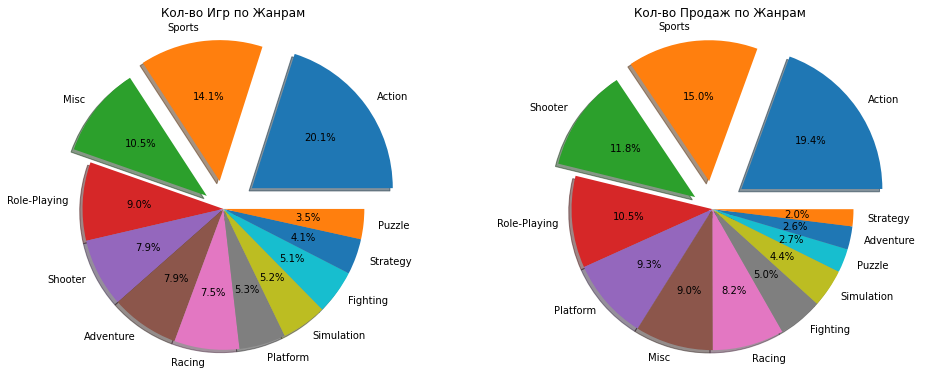

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.autofmt_xdate();

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels1 = genres.index
sizes1 = genres.values

labels2 = genre_sales.index
sizes2 = genre_sales.values
explode = (0.25, 0.2, 0.15, 0,0,0,0,0,0,0,0,0)
ax1.set_title('Кол-во Игр по Жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0)  
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.set_title('Кол-во Продаж по Жанрам')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0) 
ax2.axis('equal')

plt.show()

# fig.autofmt_xdate();

Вывод: Общее распределение игр по жанрам - в тройку лидеров входят Action(20,2%), Sports(14%) и Sports(10,5%); аутсайдеры здесь Puzzle(3,5%), Strategy(4,1%) и Fighting(5,1%)

В продажах по жанрам в лидерах опять Action(19,6%), Sports(14,9%), но на 3 месте уже Shooter(11,8); аутсайдеры здесь Strategy(2%), Puzzle(2,7%) как и в первом графике, но 3 место у Adventure(2,7%).
Можно отметить, что продажи лидера Action и аутсайдера Strategy отличаются в 10 раз.

Вывод по шагу 3

Были даны ответы на все поставленые вопросы и рассуждения подкреплены обоснованиями.

Обобщенный вывод на 2017 год ожидается подъем продаж по PS4, XOne и 3DS, так как уже многие студии-разработчики нашли применения своих техологий на этих платформах и хотят попасть на все рынки.

Шаг 4. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
-Самые популярные платформы (топ-5). Опишите различия в долях продаж.
-Самые популярные жанры (топ-5). Поясните разницу.
-Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнем с подготовки данных

In [70]:
na_actual_data_games_sales = actual_data_games_sales.query('na_sales > 0')
na_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   int64  
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     809 non-null    float64
 9   user_score       974 non-null    float64
 10  rating           1309 non-null   object 
 11  world_sales      1309 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 132.9+ KB


In [71]:
eu_actual_data_games_sales = actual_data_games_sales.query('eu_sales > 0')
eu_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   int64  
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     872 non-null    float64
 9   user_score       1047 non-null   float64
 10  rating           1422 non-null   object 
 11  world_sales      1422 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 144.4+ KB


In [72]:
jp_actual_data_games_sales = actual_data_games_sales.query('jp_sales > 0')
jp_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    float64
 9   user_score       462 non-null    float64
 10  rating           1187 non-null   object 
 11  world_sales      1187 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 120.6+ KB


Найдем по каждому региону популярную платформу.

In [73]:
na_platform_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_pivot_table

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [74]:
eu_platform_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_pivot_table

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [75]:
jp_platform_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_pivot_table

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


Рейтинг платформ:

-Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
-Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
-Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

Различия по популярности платформ в первую очередь зависят от влияния фирмы. Как результат во всех рейтингах есть продукция компании Sony.

Во-вторых - местоположение компании. Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты и компания Microsoft не хочет отставать по продажам в своем регионе. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

Найдем по каждому региону популярный жанр.

In [76]:
na_genre_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_pivot_table

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [77]:
eu_genre_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_pivot_table

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [78]:
jp_genre_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_pivot_table

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


Рейтинг жанров:

-Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
-Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
-Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

По классификации Кроуфорда miscellaneous game (Misc) - игры в категории skill-and-action. Они не относятся к боевым играм(Combat),играм с выходом из лабиринта(Maze), спортивным играм(Sports), играм на удержание мяча(Paddle) или гонкам(Race). Это новые игры, где проверяется ловкость и реакция игрока другими способами.

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.

Я сделал на круговой диаграмме, мне показалось так нагляднее

Запишем в словарь popul_5platf_dict данные по продажам топ-5 платформ в 3 регионах

In [79]:
popul_5platf_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_5platf_dict[region] = data_games_sales.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
popul_5platf_dict

{'na_sales': platform
 X360    595.74
 PS2     580.42
 Wii     486.87
 PS3     390.13
 DS      380.32
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS2     337.10
 PS3     327.21
 X360    268.37
 Wii     258.32
 PS      212.39
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 DS      175.02
 PS      139.78
 PS2     137.63
 SNES    116.55
 3DS     100.62
 Name: jp_sales, dtype: float64}

Теперь отразим это все на графиках

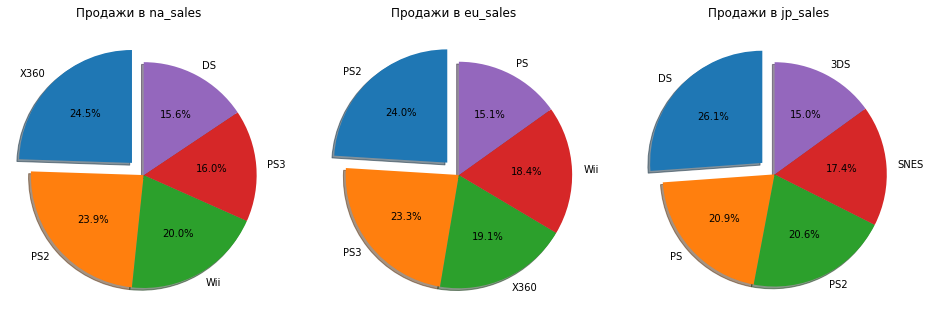

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_5platf_dict[region[i]].index
    sizes = popul_5platf_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

Запишем в словарь popul_5genre_dict данные по продажам топ-5 жанрам в 3 регионах

In [81]:
popul_5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_5genre_dict[region] = data_games_sales.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
popul_5genre_dict

{'na_sales': genre
 Action      863.17
 Sports      677.87
 Shooter     584.83
 Platform    444.44
 Misc        399.57
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action     510.99
 Sports     374.48
 Shooter    314.52
 Racing     234.99
 Misc       210.60
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    353.39
 Action          160.14
 Sports          134.98
 Platform        130.71
 Misc            107.02
 Name: jp_sales, dtype: float64}

Теперь отразим это все на графиках

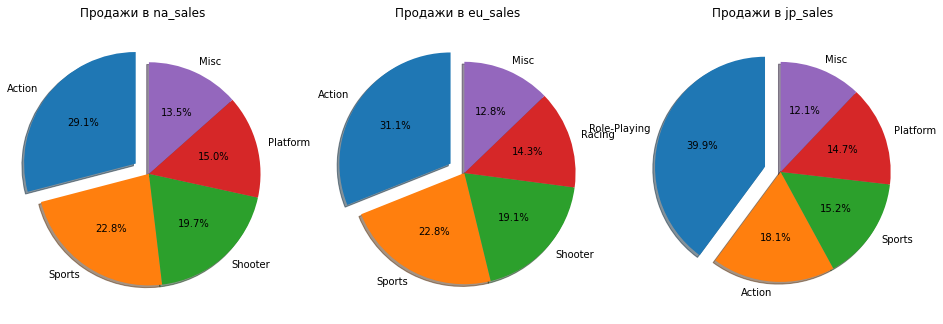

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_5genre_dict[region[i]].index
    sizes = popul_5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

Найдем влияние рейтинга на каждый регион

In [83]:
na_rating_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,184.77
E,102.09
T,96.61
E10+,54.24


In [84]:
eu_rating_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,162.21
E,108.37
T,78.96
E10+,42.69


In [85]:
jp_rating_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
T,86.62
E,33.35
M,14.92
E10+,5.89


Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение.

Вывод по шагу 4

Проведя анализ по регионам можно составить портрет игрока.

Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. Европейский игрок - от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит тратить время на RPG и экшены.

### check r.1.3

Шаг 5. Проверка гипотез

Стоит задача проверить две гипотезы:

-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
-Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Подготовим данные по первой гипотезе. Не будем учитывать игры с пустым рейтингом.

In [86]:
def stat_info(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    return [mean, variance_estimate, standart_dev]

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Среднее значение: 6.52
Дисперсия: 1.91
Стандартное отклонение: 1.38


[6.521428579157526, 1.9069968580146104, 1.3809405700516624]

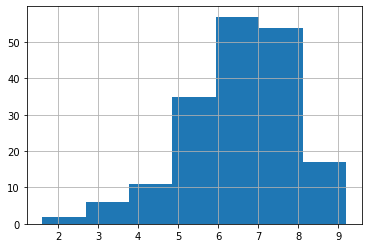

In [87]:
user_rating_XOne = actual_data_games_sales.query('platform == "XOne"')['user_score'].dropna()
stat_info(user_rating_XOne)

На первый взгляд средние похожи, но вот дисперсия выборок отличается.

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
Среднее значение: 6.27
Дисперсия: 3.04
Стандартное отклонение: 1.74


[6.269677446734521, 3.0358927793463093, 1.7423813530184227]

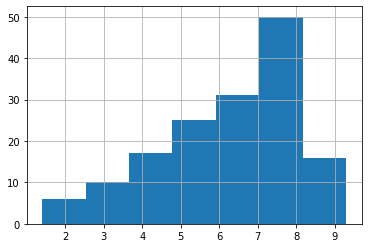

In [88]:
user_rating_PC = actual_data_games_sales.query('platform == "PC"')['user_score'].dropna()
stat_info(user_rating_PC)

In [89]:
alpha = .01

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1401266165532671
Не получилось отвергнуть нулевую гипотезу


In [90]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу - это значит, что Гипотеза №2 отвергнута

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Среднее значение: 6.84
Дисперсия: 1.77
Стандартное отклонение: 1.33


[6.837532154392155, 1.7693609196980824, 1.3301732667957518]

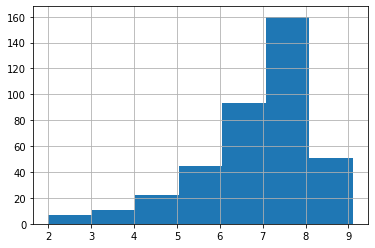

In [91]:
user_rating_Action = actual_data_games_sales.query('genre == "Action"')['user_score'].dropna()
stat_info(user_rating_Action)

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64
Среднее значение: 5.24
Дисперсия: 3.18
Стандартное отклонение: 1.78


[5.238124996516854, 3.1806128043337365, 1.7834272635388684]

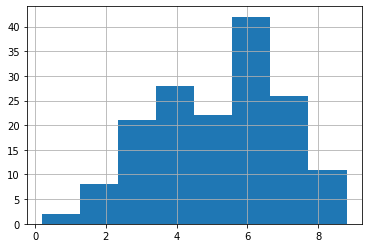

In [92]:
user_rating_Sports = actual_data_games_sales.query('genre == "Sports"')['user_score'].dropna()
stat_info(user_rating_Sports)

На первый взгляд по статистическим данным все отличается.

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги жанров Action и Sports различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

In [93]:
alpha = .01

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517817316679538e-27
Отвергаем нулевую гипотезу


Тест Стьюдента не опроверг наши догадки о различиях между выбранными жанрами.

Вывод по шагу 5



Платформа XOne старается из года в год набирать новых пользователей, чтобы соревноваться не только с PS4, но и с самой распространненной платформой на земле PC. На 2016 год по качеству игр они близки к компьютерным.

Различия между Action и Sports существуют из-за опыта создания игр. Первые экшены появились в 80х годах и из года в год они становятся интересней, так как им есть на что ровняться в прошлом. У спортивных игр в большинстве случаев ограничением в рейтингах стоит симуляция реальных спортивных игр. И любителям этой серии иногда приходиться сталкиваться с непонятными решениями в этих играх.

Шаг 6. Напишите общий вывод

В ходе проделанной работы было выполнено:

-Просмотрена таблица, выявлены аномалии и пропущенные значения.
-Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
-Проведен анализ по данным и подготовлены актуальные данные.
-Составлены портреты пользователей для купных регионов продаж.
-Выполнены проверки гипотез.

Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана и какого она жанра.

-По первому пунку сейчас популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов, которая обязательно купит их игру.
-Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
-Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.

Сводный анализ для кампании на 2017 год.

-Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS.
-Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
-Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
-Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.

### check r.end

In [94]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Бонус

In [95]:
data_games = pd.read_csv('/datasets/games.csv')

In [96]:
data_games.columns = map(str.lower, data_games.columns)

In [97]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [98]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [99]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [100]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [101]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'red'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

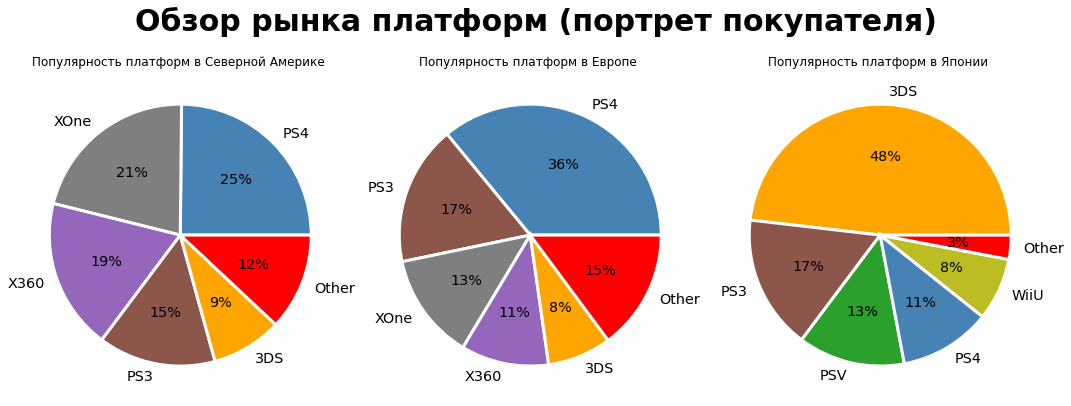

In [102]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2013

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

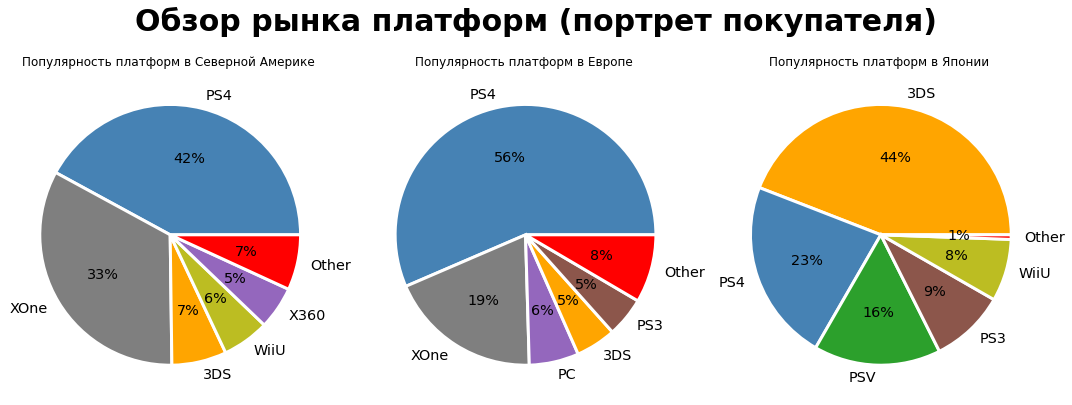

In [103]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])